In [1]:
#chargement des packages necessaire

import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno

In [2]:
#importation du jeu de données 
hopital = pd.read_csv("satisfaction_hopital.csv", sep= ";")

In [3]:
df = hopital.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   service             534 non-null    int64  
 1   sexe                534 non-null    int64  
 2   age                 528 non-null    float64
 3   profession          427 non-null    float64
 4   amelioration.sante  376 non-null    float64
 5   amelioration.moral  383 non-null    float64
 6   recommander         405 non-null    float64
 7   score.relation      349 non-null    float64
 8   score,information   358 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 37.7 KB


In [5]:
#transformation de la variable 'score,information' en 'ScoreInfo'

df.rename(columns={'score,information': 'ScoreInfo'}, inplace=True)


Text(0.5, 1.0, 'Visualisation des Valeurs Manquantes dans le Jeu de Données')

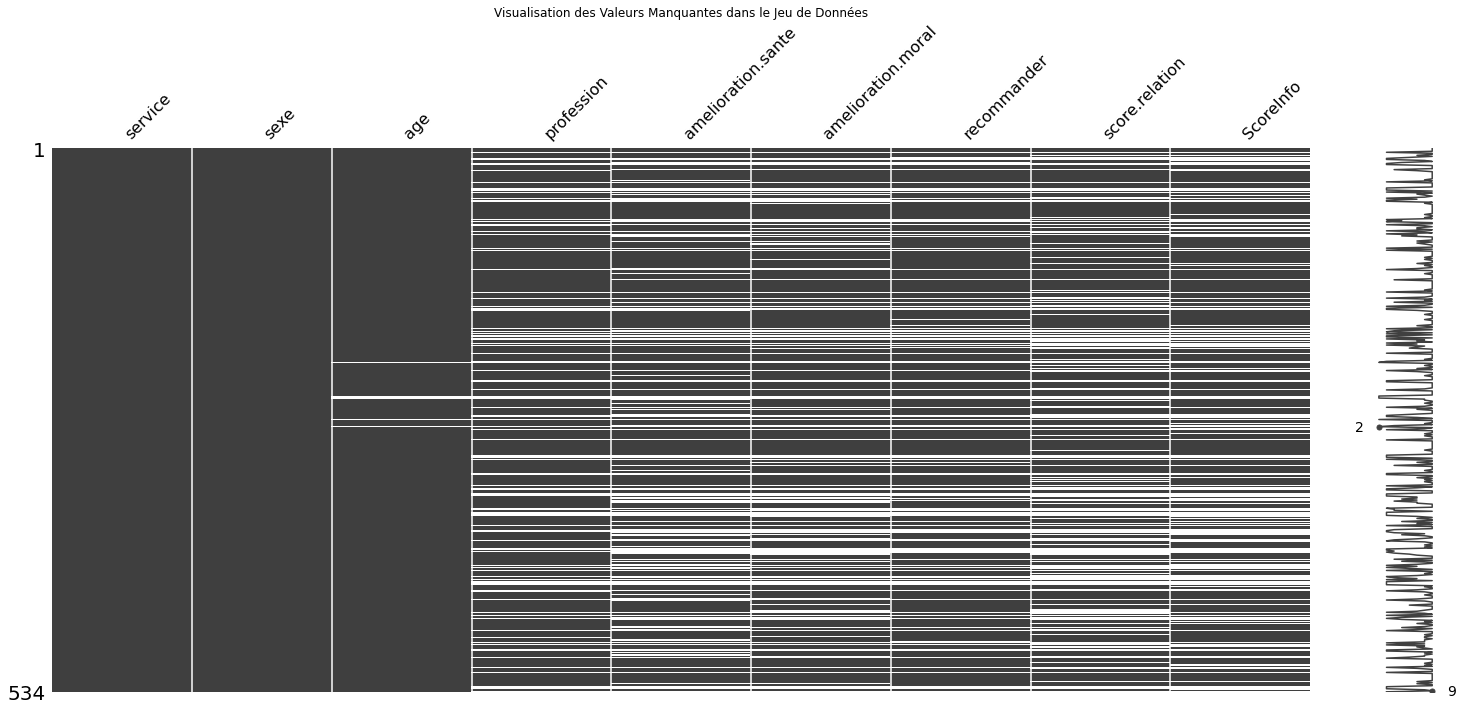

In [6]:
# visualisation et traitement des valeurs manquantes

##visualisation des valeurs manquantes
msno.matrix(df) # Tracer la matrice de valeurs manquantes
plt.title('Visualisation des Valeurs Manquantes dans le Jeu de Données')

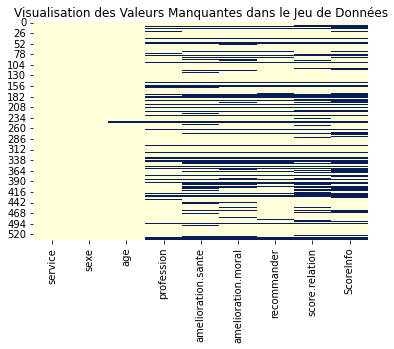

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
# Création de la heatmap pour visualiser les valeurs manquantes
sns.heatmap(df.isnull(), cbar=False, cmap='YlGnBu')
plt.title('Visualisation des Valeurs Manquantes dans le Jeu de Données')
plt.show()

## traitement des valeurs manquantes avec la méthode (K plus proche voisin)

### fonction determination de K optimal

In [8]:
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

In [9]:
def custom_metric(y_true, y_imputed):
    absolute_difference = np.abs(y_true - y_imputed)
    non_nan_indices = ~np.isnan(absolute_difference)
    
    if np.any(non_nan_indices):  # Vérifie si au moins une différence non nulle
        return -np.mean(absolute_difference[non_nan_indices])
    else:
        return 0.0  # Retourne 0 si toutes les différences sont nulles ou NaN

def trouver_k_optimal(dataframe, variables_a_imputer):
    """
    Fonction pour trouver la valeur optimale de K pour l'imputation KNN.
    Parameters:
    - dataframe: DataFrame pandas
    - variables_a_imputer: Liste des noms des variables à imputer
    Returns:
    - Meilleur K trouvé
    """
    # Vérifiez les noms de colonnes
    for variable in variables_a_imputer:
        if variable not in dataframe.columns:
            raise ValueError(f"La variable '{variable}' n'existe pas dans le DataFrame.")
    
    # Séparez les données en features (X)
    X = dataframe[variables_a_imputer]
    
    # Range de valeurs de K à tester
    k_values = range(1, 21)
    
    # Initialisation des variables de suivi du meilleur score
    meilleur_score = float('-inf')
    meilleur_k = None
    
    for k in k_values:
        # Créez l'imputeur KNN avec le paramètre k actuel
        imputer = KNNImputer(n_neighbors=k)
        # Imputez les valeurs manquantes
        X_imputed = imputer.fit_transform(X)
        # Calculez le score avec la métrique personnalisée
        score = custom_metric(X.values, X_imputed)
        print(f"K={k}, Score={score}")
        # Mettez à jour le meilleur score et la meilleure valeur de K
        if score > meilleur_score:
            meilleur_score = score
            meilleur_k = k
    
    print(f"Meilleur K trouvé : {meilleur_k}")
    print(f"Meilleur score : {meilleur_score}")
    return meilleur_k



In [10]:
# Utilisation de la fonction pour déterminer K
variables_a_imputer = ['age', 'profession', 'amelioration.sante', 'amelioration.moral', 'recommander', 'score.relation', 'ScoreInfo']
trouver_k_optimal(df, variables_a_imputer)
import pandas as pd
from sklearn.impute import KNNImputer

# Liste des variables à imputer
variables_a_imputer = ['service', 'sexe', 'age', 'profession', 'amelioration.sante', 'amelioration.moral', 'recommander', 'score.relation', 'ScoreInfo']

# Imputation des valeurs manquantes avec K-plus proche voisin
imputer = KNNImputer(n_neighbors=1)  # Vous pouvez ajuster le nombre de voisins selon vos besoins
df_imputed = pd.DataFrame(imputer.fit_transform(df[variables_a_imputer]), columns=variables_a_imputer)
# df_imputed contient maintenant les valeurs imputées

K=1, Score=-0.0
K=2, Score=-0.0
K=3, Score=-0.0
K=4, Score=-0.0
K=5, Score=-0.0
K=6, Score=-0.0
K=7, Score=-0.0
K=8, Score=-0.0
K=9, Score=-0.0
K=10, Score=-0.0
K=11, Score=-0.0
K=12, Score=-0.0
K=13, Score=-0.0
K=14, Score=-0.0
K=15, Score=-0.0
K=16, Score=-0.0
K=17, Score=-0.0
K=18, Score=-0.0
K=19, Score=-0.0
K=20, Score=-0.0
Meilleur K trouvé : 1
Meilleur score : -0.0


In [11]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   service             534 non-null    float64
 1   sexe                534 non-null    float64
 2   age                 534 non-null    float64
 3   profession          534 non-null    float64
 4   amelioration.sante  534 non-null    float64
 5   amelioration.moral  534 non-null    float64
 6   recommander         534 non-null    float64
 7   score.relation      534 non-null    float64
 8   ScoreInfo           534 non-null    float64
dtypes: float64(9)
memory usage: 37.7 KB


Text(0.5, 1.0, 'Visualisation après des Valeurs Manquantes dans le Jeu de Données')

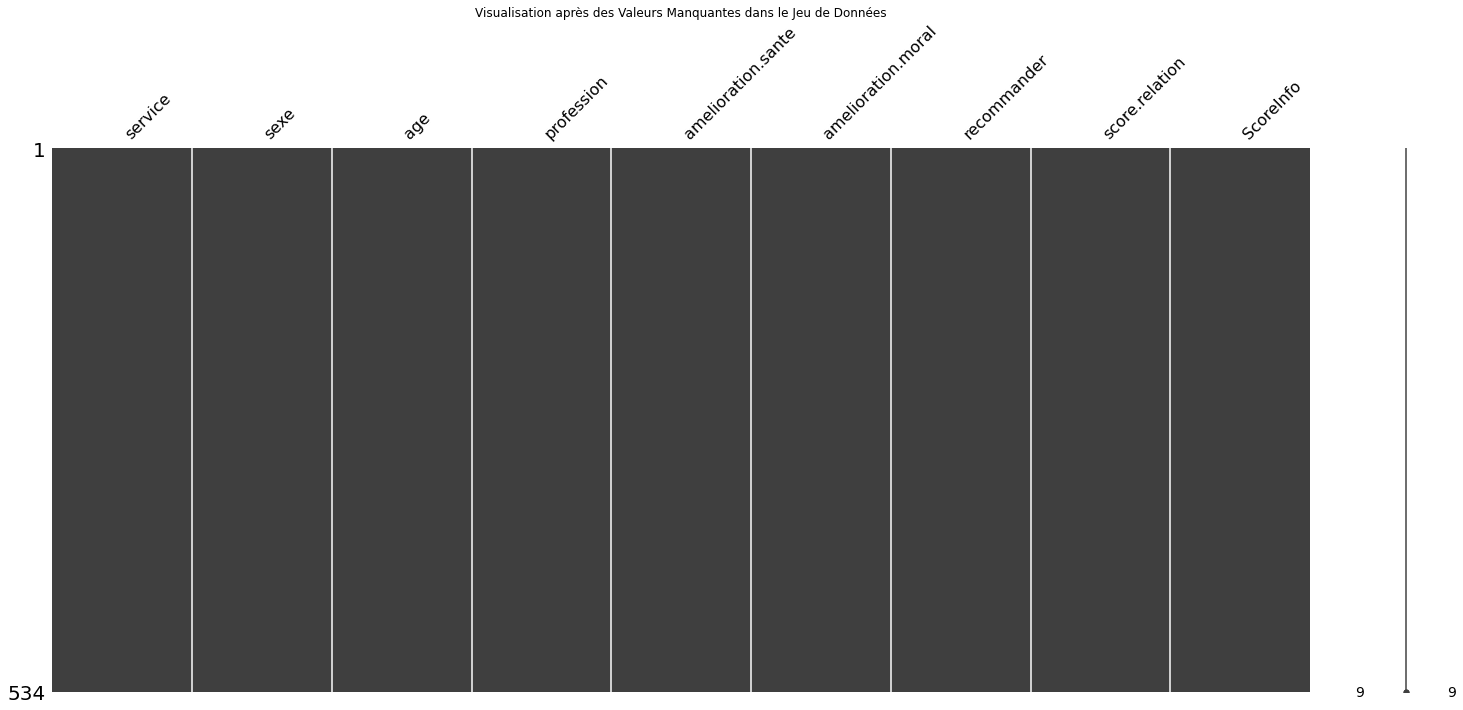

In [12]:
##visualisation des valeurs manquantes après traitement

msno.matrix(df_imputed) # Tracer la matrice de valeurs manquantes
plt.title('Visualisation après des Valeurs Manquantes dans le Jeu de Données')

In [13]:
#transformation des types des variables si necessaire

colonnes_a_convertir = ["service", "sexe", "profession", "amelioration.sante", "amelioration.moral", "recommander"]
df_imputed[colonnes_a_convertir] = df_imputed[colonnes_a_convertir].astype('category')
df_imputed.info()   #visualsation du structure du jeu de données après transformation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   service             534 non-null    category
 1   sexe                534 non-null    category
 2   age                 534 non-null    float64 
 3   profession          534 non-null    category
 4   amelioration.sante  534 non-null    category
 5   amelioration.moral  534 non-null    category
 6   recommander         534 non-null    category
 7   score.relation      534 non-null    float64 
 8   ScoreInfo           534 non-null    float64 
dtypes: category(6), float64(3)
memory usage: 17.1 KB


In [14]:
#Arrondir les variables
df_imputed['age'] = df_imputed['age'].astype(np.int64)
df_imputed['score.relation'] = df_imputed['score.relation'].astype(np.int64)
df_imputed['ScoreInfo'] = df_imputed['ScoreInfo'].astype(np.int64)

In [15]:
# df_imputed.pop('score_information')

In [16]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   service             534 non-null    category
 1   sexe                534 non-null    category
 2   age                 534 non-null    int64   
 3   profession          534 non-null    category
 4   amelioration.sante  534 non-null    category
 5   amelioration.moral  534 non-null    category
 6   recommander         534 non-null    category
 7   score.relation      534 non-null    int64   
 8   ScoreInfo           534 non-null    int64   
dtypes: category(6), int64(3)
memory usage: 17.1 KB


In [17]:
#Comptage du nombre de doublon
len(df_imputed[df_imputed.duplicated()])

42

In [18]:
#Visualisation des doublons
df_imputed[df_imputed.duplicated()]

,service,sexe,age,profession,amelioration.sante,amelioration.moral,recommander,score.relation,ScoreInfo
10,3.0,1.0,84,5.0,3.0,1.0,2.0,39,20
41,4.0,0.0,83,3.0,2.0,1.0,2.0,37,37
43,4.0,0.0,75,3.0,3.0,3.0,2.0,37,39
52,4.0,0.0,81,3.0,3.0,3.0,2.0,37,37
57,4.0,0.0,78,4.0,2.0,1.0,2.0,37,30
72,4.0,0.0,67,4.0,3.0,1.0,2.0,37,31
75,4.0,0.0,78,4.0,2.0,1.0,2.0,37,30
81,4.0,0.0,65,3.0,2.0,0.0,0.0,22,25
124,1.0,1.0,64,5.0,2.0,1.0,2.0,34,26
129,1.0,0.0,42,8.0,2.0,2.0,2.0,35,33


In [19]:
#Suppression des doublons
df_imputed=df_imputed.drop_duplicates()

In [20]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 533
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   service             492 non-null    category
 1   sexe                492 non-null    category
 2   age                 492 non-null    int64   
 3   profession          492 non-null    category
 4   amelioration.sante  492 non-null    category
 5   amelioration.moral  492 non-null    category
 6   recommander         492 non-null    category
 7   score.relation      492 non-null    int64   
 8   ScoreInfo           492 non-null    int64   
dtypes: category(6), int64(3)
memory usage: 19.6 KB


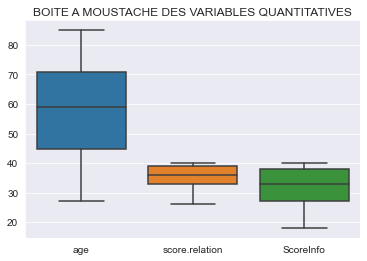

In [134]:
#visualisation et traitement des valeurs aberrantes
import seaborn as sns

## Afficher la boîte à moustaches
sns.set_style('darkgrid')
sns.boxplot(data= df_imputed)
plt.title('BOITE A MOUSTACHE DES VARIABLES QUANTITATIVES AVANT WINZORISATION')
plt.show()

In [22]:
from scipy.stats.mstats import winsorize # Pour Winzorizer

In [23]:
df_imputed.loc[:,('score.relation')] = winsorize(df_imputed.loc[:,('score.relation')], (0.05,0.05))
df_imputed.loc[:,('ScoreInfo')] = winsorize(df_imputed.loc[:,('ScoreInfo')], (0.05,0.05))
df_imputed.loc[:,('age')] = winsorize(df_imputed.loc[:,('age')], (0.05,0.05))

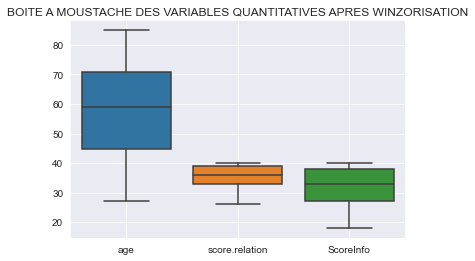

In [135]:
## Afficher la boîte à moustaches
sns.set_style('darkgrid')
sns.boxplot(data= df_imputed)
plt.title('BOITE A MOUSTACHE DES VARIABLES QUANTITATIVES APRES WINZORISATION')
plt.grid(True)  # Ajouter des lignes de grille
plt.show()

In [25]:
## Renommer le Df
df_propre = df_imputed.copy()

In [26]:
#transformations des variable

df_propre['sexe'] = df_propre['sexe'].replace({0.0: 'homme', 1.0: 'femme'})
df_propre['recommander'] = df_propre['recommander'].replace({0.0: 'non', 1.0: 'oui,probablement', 2.0: 'oui,sûrement'})
df_propre['AmelioSante'] = df_propre['amelioration.sante'].replace({0.0: 'aggrravée', 1.0: 'aucune amélioration', 2.0: 'peu améliorée', 3.0: 'nettement améliorée'})
df_propre['AmelioMorale'] = df_propre['amelioration.moral'].replace({0.0: 'aggrravé', 1.0: 'aucune amélioration', 2.0: 'peu amélioré', 3.0: 'nettement amélioré'})
df_propre['profession'] = df_propre['profession'].replace({1.0: 'agriculteur', 2.0: 'artisan', 3.0: 'cadre', 4.0 : 'prof_intermédiaire', 5.0: 'employé', 6.0: 'ouvrier', 7.0: 'sans emploi', 8.0: 'autre'})

# Analyse unvariée des quantitatives

In [27]:
df_propre.describe()

,age,score.relation,ScoreInfo
count,492.000000,492.000000,492.000000
mean,57.662602,35.390244,31.930894
std,16.998262,4.220277,6.641174
min,27.000000,26.000000,18.000000
25%,44.750000,33.000000,27.000000
50%,59.000000,36.000000,33.000000
75%,71.000000,39.000000,38.000000
max,85.000000,40.000000,40.000000


In [28]:

quanti = ['age', 'score.relation', 'ScoreInfo']
for var in quanti:
    print(f'Ecart-type de {var} est:', round(df_propre[var].std(), 2))
    print(f'Le Skewness de {var} est:', round(df_propre[var].skew(), 2))
    print(f'Le Kurtosis de {var} est:', round(df_propre[var].skew(), 2))
    print(f'Le mode de {var} est:', round(df_propre[var].mode(), 2),'\n')

Ecart-type de age est: 17.0
Le Skewness de age est: -0.15
Le Kurtosis de age est: -0.15
Le mode de age est: 0    27
Name: age, dtype: int64 

Ecart-type de score.relation est: 4.22
Le Skewness de score.relation est: -0.77
Le Kurtosis de score.relation est: -0.77
Le mode de score.relation est: 0    40
Name: score.relation, dtype: int64 

Ecart-type de ScoreInfo est: 6.64
Le Skewness de ScoreInfo est: -0.54
Le Kurtosis de ScoreInfo est: -0.54
Le mode de ScoreInfo est: 0    40
Name: ScoreInfo, dtype: int64 



# Analyse unvariée des variables qualitatives

In [29]:
# Isolement des variables qualitatives

quali=[] # Initialisation de quali en tant que liste vide

for col in df_propre.columns:
    if df_propre[col].dtype == 'category':
        quali.append(col)
        
print(quali)

['service', 'sexe', 'profession', 'amelioration.sante', 'amelioration.moral', 'recommander', 'AmelioSante', 'AmelioMorale']


In [136]:
# Effectif des variables
colQuali = ['sexe', 'profession', 'recommander', 'service']
for var in colQuali:
    print(f"L'effectif par {var} est:\n", round(df_propre[var].value_counts(), 2),"\n")
    

L'effectif par sexe est:
 femme    247
homme    245
Name: sexe, dtype: int64 

L'effectif par profession est:
 cadre                 143
prof_intermédiaire    103
employé                77
ouvrier                49
autre                  49
artisan                46
sans emploi            24
agriculteur             1
Name: profession, dtype: int64 

L'effectif par recommander est:
 oui,sûrement        324
oui,probablement    144
non                  24
Name: recommander, dtype: int64 

L'effectif par service est:
 8.0    67
3.0    65
1.0    62
4.0    62
5.0    61
7.0    61
6.0    60
2.0    54
Name: service, dtype: int64 



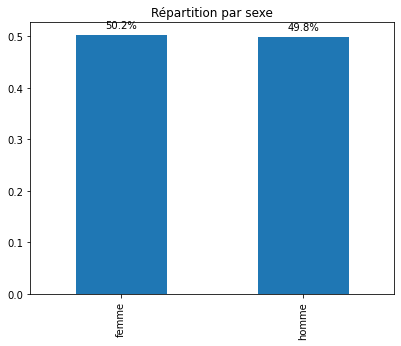

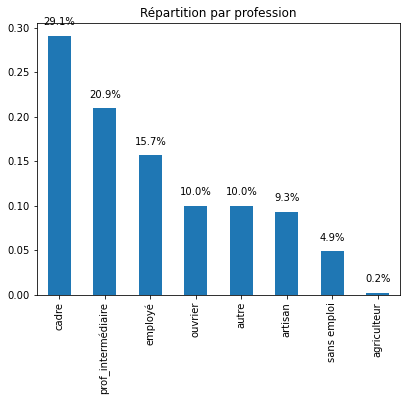

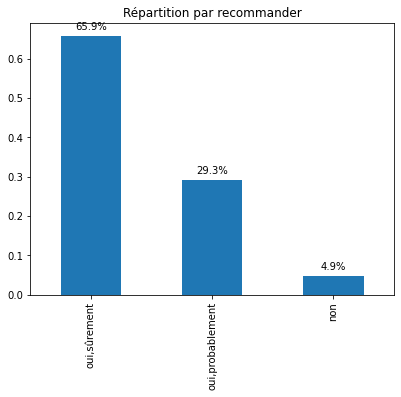

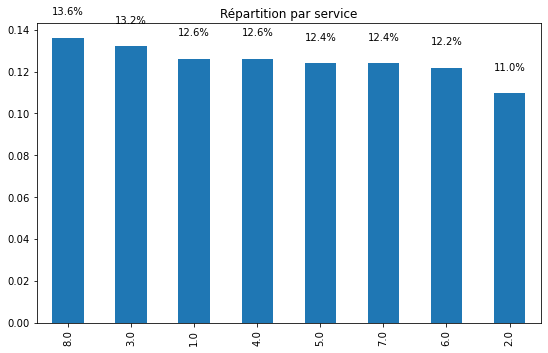

In [31]:
for i, var in enumerate(colQuali):
    # Plotting - Diagramme en barres pour chaque variable qualitative
    plt.figure(figsize=(30, 5))
    plt.subplot(1, 4, i+1)
    counts = df_propre[var].value_counts(normalize=True)
    counts.plot.bar()
    plt.title(f'Répartition par {var}')
    
    # Ajouter les étiquettes avec les pourcentages
    for index, value in enumerate(counts):
        plt.text(index, value + 0.01, f'{value*100:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# I- Tests de comparaison de proportions

## 1- *La proportion de sujets recommandant le service dans lequel ils sont passés est-il le même quel que soit le genre ?*

In [154]:
# Tableau de contingence (Effectif)
TabEff1 = pd.crosstab(df_propre.recommander, df_propre.sexe, margins=True, margins_name='Total')
print('Les effectifs des recommandations par sexe sont:\n\n',TabEff1)

Les effectifs des recommandations par sexe sont:

 sexe              homme  femme  Total
recommander                          
non                  12     12     24
oui,probablement     71     73    144
oui,sûrement        162    162    324
Total               245    247    492


<Figure size 1440x504 with 0 Axes>

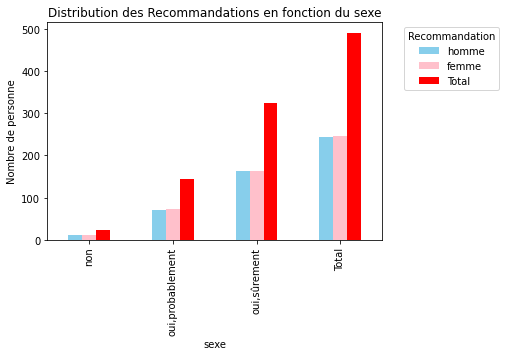

In [33]:
plt.figure(figsize=(20, 7))
TabEff1.plot(kind='bar', stacked=False, color=['skyblue', 'pink', 'red'])
plt.title('Distribution des Recommandations en fonction du sexe')
plt.xlabel('sexe')
plt.ylabel('Nombre de personne')
plt.legend(title='Recommandation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [34]:
# Tableau de contingence (Frequence)
TabEff1 = pd.crosstab( df_propre.recommander, df_propre.sexe, margins=True, margins_name='Total', normalize='columns')
print('La frequence des recommandations par sexe est:\n\n', TabEff1)

La frequence des recommandations par sexe est:

 sexe                 homme     femme     Total
recommander                                   
non               0.048980  0.048583  0.048780
oui,probablement  0.289796  0.295547  0.292683
oui,sûrement      0.661224  0.655870  0.658537


### Test de Khy-deux d'Independance

In [35]:
from scipy.stats import chi2_contingency
# Effectif theorique
chi2, p, _, theo = chi2_contingency(TabEff1)
print("L'effectif theorique est:\n\n", theo)

L'effectif theorique est:

 [[0.04878103 0.04878103 0.04878103]
 [0.29267513 0.29267513 0.29267513]
 [0.65854384 0.65854384 0.65854384]]


In [137]:
# Test d'Independance pour les variables catégorielles

# Effectuer le test du Chi-2
chi2_stat, p_value, dof, expected = chi2_contingency(TabEff1)

# Imprimer les résultats
print(f"Statistique de test du Chi-2 : {chi2_stat}")
print(f"P-value : {p_value}")
print(f"Degrés de liberté : {dof}")
print("Tableau de fréquences attendues :")
print(expected)

# Interpréter les résultats
alpha = 0.05
if p_value < alpha:
    print("On rejette l'hypothèse nulle. Les variables ne sont pas indépendantes.")
else:
    print("On ne rejette pas l'hypothèse nulle. Les variables sont indépendantes.")

Statistique de test du Chi-2 : 7.987301105035432e-05
P-value : 0.999999999202559
Degrés de liberté : 4
Tableau de fréquences attendues :
[[0.04878103 0.04878103 0.04878103]
 [0.29267513 0.29267513 0.29267513]
 [0.65854384 0.65854384 0.65854384]]
On ne rejette pas l'hypothèse nulle. Les variables sont indépendantes.


### 2- *La moyenne du score de relation est-il significativement différent chez les hommes et chez les femmes ?*


#### Etape 1: Analyse graphique des sous pop.

In [37]:
df_propre.columns

Index(['service', 'sexe', 'age', 'profession', 'amelioration.sante',
       'amelioration.moral', 'recommander', 'score.relation', 'ScoreInfo',
       'AmelioSante', 'AmelioMorale'],
      dtype='object')

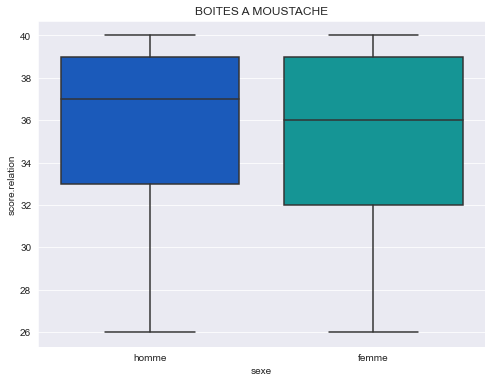

In [140]:
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
sns.boxplot(data=df_propre, x='sexe', y='score.relation', palette='winter')
plt.title('BOITES A MOUSTACHE')
plt.show()

#### Etape 2: Statistiques de base des sous populations

In [39]:
Stat = df_propre.groupby('sexe')['score.relation'].describe()

In [40]:
Stat

,count,mean,std,min,25%,50%,75%,max
sexe,,,,,,,,
homme,245.0,35.555102,4.138239,26.0,33.0,37.0,39.0,40.0
femme,247.0,35.226721,4.302251,26.0,32.0,36.0,39.0,40.0


#### Etape 3: Test de Normalite dans les sous-populations

In [41]:
from scipy.stats import shapiro

In [42]:
# Histogrammes 
grp = df_propre.groupby('sexe')['score.relation'].value_counts()
grp

sexe   score.relation
homme  40                44
       38                32
       39                31
       35                21
       37                21
       33                20
       36                15
       26                14
       34                11
       31                 8
       32                 8
       28                 7
       30                 7
       27                 4
       29                 2
femme  40                47
       39                33
       38                24
       34                18
       36                17
       33                16
       35                16
       26                14
       32                14
       37                12
       28                10
       30                10
       31                 8
       29                 5
       27                 3
Name: score.relation, dtype: int64

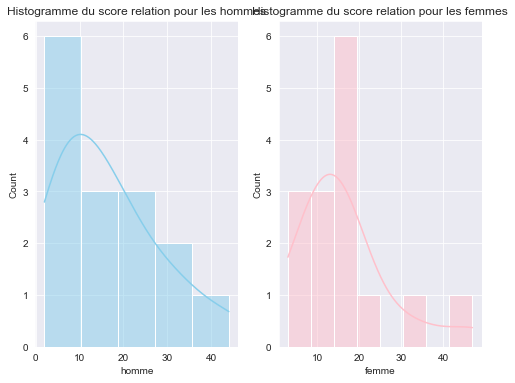

In [144]:
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
plt.subplot(121)
sns.histplot(data=grp, x='homme', color='skyblue', kde=True)
plt.title('Histogramme du score relation pour les hommes')

plt.subplot(122)
sns.histplot(data=grp, x='femme', color='pink', kde=True)
plt.title('Histogramme du score relation pour les femmes')
plt.show()

In [145]:
for sexe in df_propre['sexe'].unique():
    stat, p = shapiro(df_propre['score.relation'][df_propre['sexe'] == sexe]) 
    print(f"Shapiro test pour la modalité {sexe}: Statistic={stat:.5f}, P-value={p:.5f}") 
    
    # Interprétation 
    alpha = 0.05 
    if p > alpha: 
        print("L'échantillon semble suivre une distribution normale (on ne rejette pas H0), alors on continue avec le test parametrique de Barlett\n") 
    else: 
        print("L'échantillon ne semble pas suivre une distribution normale (on rejette H0), alors on continue avec l'un des tests non-parametriques de Barlett de wilcox.test ou kruskal.test\n") 

Shapiro test pour la modalité homme: Statistic=0.88098, P-value=0.00000
L'échantillon ne semble pas suivre une distribution normale (on rejette H0), alors on continue avec l'un des tests non-parametriques de Barlett de wilcox.test ou kruskal.test

Shapiro test pour la modalité femme: Statistic=0.89627, P-value=0.00000
L'échantillon ne semble pas suivre une distribution normale (on rejette H0), alors on continue avec l'un des tests non-parametriques de Barlett de wilcox.test ou kruskal.test



#### Etape 4: Test d'égalite des moyennnes: test de Wilcoxon

In [45]:
from scipy.stats import mannwhitneyu

In [46]:
scoreFemme=grp.femme
print(scoreFemme.shape)

scoreHomme=grp.homme
print(scoreHomme.shape)

(15,)
(15,)


In [47]:
# Effectuer le test de Wilcoxon sur les rangs
statistique, p_valeur = mannwhitneyu(scoreHomme, scoreFemme)

# Afficher les résultats
print("Statistique U de Mann-Whitney :", statistique)
print("P-valeur :", p_valeur)

# Vérifier si le résultat est statistiquement significatif
alpha = 0.05
if p_valeur < alpha:
    print("Rejeter l'hypothèse nulle : Il y a une différence significative entre les échantillons.")
else:
    print("Ne pas rejeter l'hypothèse nulle : Il n'y a pas de différence significative entre les échantillons.")

Statistique U de Mann-Whitney : 106.0
P-valeur : 0.8032050994203768
Ne pas rejeter l'hypothèse nulle : Il n'y a pas de différence significative entre les échantillons.


### 3- *Le score de relation est-il significativement corrélé à l’âge?*


#### Etape 1: Analyse graphique des Variables

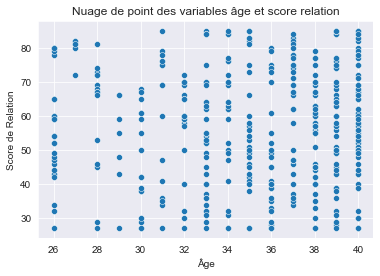

In [146]:
# Visualisation de la relation
sns.scatterplot(data=df_propre, x='score.relation', y='age')
plt.title('Nuage de point des variables âge et score relation')
plt.xlabel('Âge')
plt.ylabel('Score de Relation')

plt.show()

#### Etape 2: Analyse de la normalité des Variables

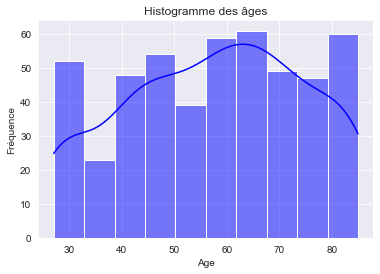

In [147]:
#histogramme des ages
sns.histplot(data=df_propre, x='age', kde=True, color='blue')
plt.title('Histogramme des âges')
plt.xlabel('Age')
plt.ylabel('Fréquence')
plt.show()

In [50]:
import statsmodels.api as sm

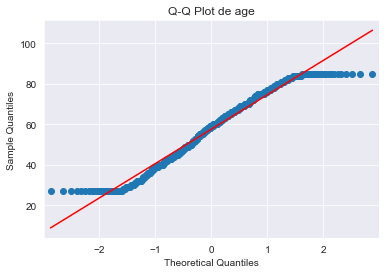

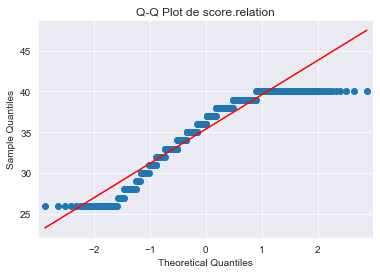

In [148]:
columns_to_test = ['age', 'score.relation']
# Créer les Q-Q plots pour chaque colonne
for column in columns_to_test:
    # Supprimez les valeurs manquantes avant de créer le Q-Q plot
    data = df_propre[column].dropna()
    # Créer le Q-Q plot
    fig, ax = plt.subplots()
    sm.qqplot(data, line='s', ax=ax)
    ax.set_title(f'Q-Q Plot de {column}')
    # Afficher le graphique
    plt.show()

In [149]:
##test de shapiro

from scipy.stats import shapiro
# Supposons que df contienne vos données et que 'Variable1' et 'Variable2' soient les colonnes à tester
columns_to_test = ['age', 'score.relation']
# Boucle sur les colonnes pour effectuer le test de Shapiro-Wilk
for column in columns_to_test:
    # Supprimez les valeurs manquantes avant de faire le test
    data = df_propre[column].dropna()
    # Effectuez le test de Shapiro-Wilk
    stat, p_value = shapiro(data)
    # Affichez les résultats
    print(f'Test de Shapiro-Wilk pour {column}: Statistique = {stat}, p-value = {p_value}')
    # Interprétation du résultat
    alpha = 0.05
    if p_value > alpha:
        print(f'Le test n\'a pas rejeté l\'hypothèse nulle. Les données semblent normalement distribuées.\n')
    else:
        print(f'Le test a rejeté l\'hypothèse nulle. Les données ne semblent pas suivre une distribution normale.\n')

Test de Shapiro-Wilk pour age: Statistique = 0.9616654515266418, p-value = 5.07744568611912e-10
Le test a rejeté l'hypothèse nulle. Les données ne semblent pas suivre une distribution normale.

Test de Shapiro-Wilk pour score.relation: Statistique = 0.889987587928772, p-value = 2.826735474215731e-18
Le test a rejeté l'hypothèse nulle. Les données ne semblent pas suivre une distribution normale.



#### Etape 3: calcul de coefficient de corrélation de spearman

In [53]:
from scipy.stats import spearmanr

data = df_propre[['age', 'score.relation']].dropna()
# Calcul de la matrice de corrélation
correlation_matrix = data.corr()
# Afficher le coefficient de corrélation entre 'Age' et 'Score_de_relation'
correlation_coefficient = round(correlation_matrix.loc['age', 'score.relation'], 2)
print(f"Coefficient de corrélation : {correlation_coefficient}")


Coefficient de corrélation : 0.05


#### Etape 4: Test de spearman

In [151]:
data = df_propre[['age', 'score.relation']].dropna()
# Effectuer le test de corrélation de Spearman
correlation_coefficient, p_value = spearmanr(data['age'], data['score.relation'])
# Afficher les résultats
print(f"Coefficient de corrélation de Spearman : {correlation_coefficient}")
print(f"P-valeur : {p_value}")
# Interprétation du résultat
alpha = 0.05
if p_value < alpha:
    print("La corrélation est statistiquement significative.")
else:
    print("La corrélation n'est pas statistiquement significative.")

Coefficient de corrélation de Spearman : 0.0666111804142539
P-valeur : 0.14010819936316002
La corrélation n'est pas statistiquement significative.


### 4) Peut-on affirmer que la qualité de l’information reçue est la même quelle que soit la profession?

#### Etape 1: Analyse graphique des Variables

In [155]:
df_propre.columns

Index(['service', 'sexe', 'age', 'profession', 'amelioration.sante',
       'amelioration.moral', 'recommander', 'score.relation', 'ScoreInfo',
       'AmelioSante', 'AmelioMorale'],
      dtype='object')

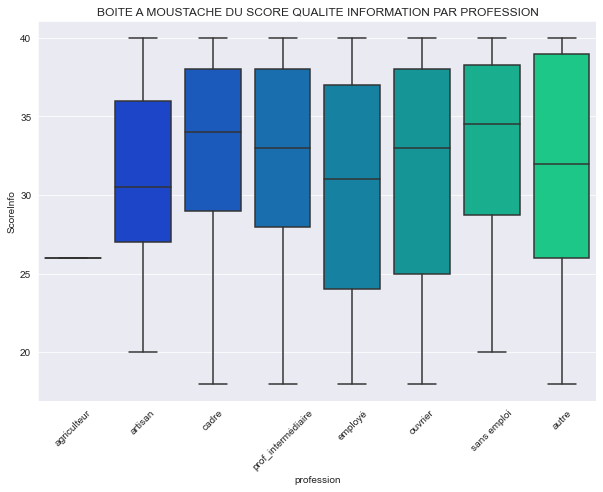

In [150]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 7))
sns.boxplot(data=df_propre, x='profession', y='ScoreInfo', palette='winter')
plt.title("BOITE A MOUSTACHE DU SCORE QUALITE INFORMATION PAR PROFESSION")
plt.xticks(rotation=45) # Ajustez la rotation des étiquettes á 45°
plt.show()

#### Etape 2: Statistiques de base des sous populations

In [64]:
StatBase = df_propre.groupby('profession')['ScoreInfo'].describe()
StatBase

,count,mean,std,min,25%,50%,75%,max
profession,,,,,,,,
agriculteur,1.0,26.000000,NaN,26.0,26.00,26.0,26.00,26.0
artisan,46.0,31.239130,5.839272,20.0,27.00,30.5,36.00,40.0
cadre,143.0,33.195804,5.957902,18.0,29.00,34.0,38.00,40.0
prof_intermédiaire,103.0,32.029126,6.409944,18.0,28.00,33.0,38.00,40.0
employé,77.0,30.103896,7.602950,18.0,24.00,31.0,37.00,40.0
ouvrier,49.0,31.693878,6.907737,18.0,25.00,33.0,38.00,40.0
sans emploi,24.0,33.708333,5.614261,20.0,28.75,34.5,38.25,40.0
autre,49.0,31.040816,7.664744,18.0,26.00,32.0,39.00,40.0


#### Etape 3: Test de Normalite dans les sous-populations

In [65]:
# Effectif 
grpEff = df_propre.groupby('profession')['ScoreInfo'].value_counts()
grpEff

profession   ScoreInfo
agriculteur  26           1
artisan      26           6
             27           6
             35           6
             37           5
                         ..
autre        24           1
             29           1
             30           1
             34           1
             37           1
Name: ScoreInfo, Length: 128, dtype: int64

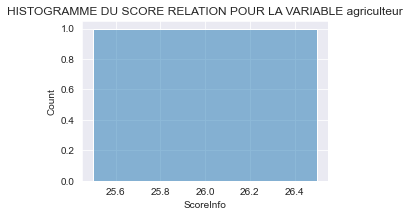

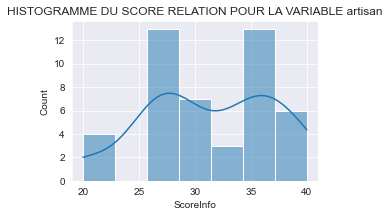

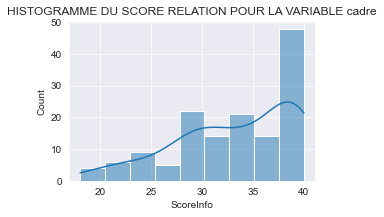

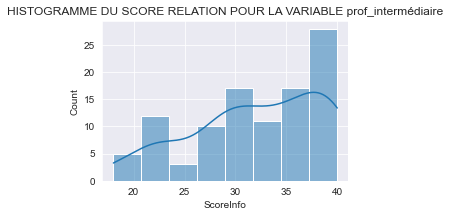

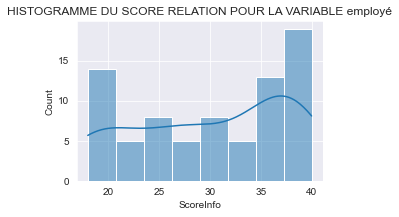

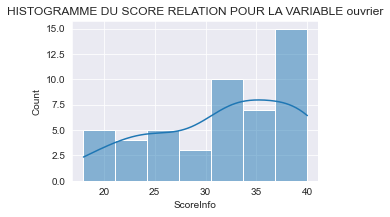

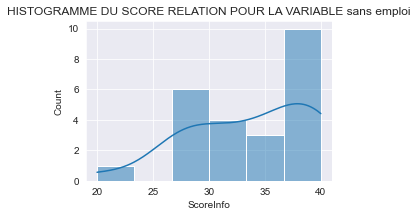

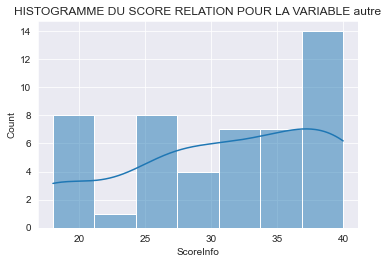

In [129]:
# Histogrammes 
professions = ['agriculteur', 'artisan', 'cadre', 'prof_intermédiaire', 'employé', 'ouvrier', 'sans emploi', 'autre']
# Boucle pour créer les sous-graphiques
for i, profession in enumerate(professions):
    plt.figure(figsize=(15, 10))
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df_propre[df_propre['profession'] == profession], x='ScoreInfo', kde=True)
    plt.title(f'HISTOGRAMME DU SCORE RELATION POUR LA VARIABLE {profession}')

# Ajustement du format de disposition
plt.tight_layout()
plt.show()

In [152]:
# Test de Shapiro 
for profession in df_propre['profession'].unique():
    data_profession = df_propre['ScoreInfo'][df_propre['profession'] == profession]
    
    # Vérifiez si vous avez au moins trois observations
    if len(data_profession) >= 3:
        stat, p = shapiro(data_profession)
        print(f"Shapiro test pour la modalité -{profession}-: Statistic={stat:.5f}, P-value={p:.5f}")
        
        # Interprétation 
        alpha = 0.05 
        if p > alpha: 
            print("L'échantillon semble suivre une distribution normale (on ne rejette pas H0), alors on continue avec le test parametrique de Barlett\n") 
        else: 
            print("L'échantillon ne semble pas suivre une distribution normale (on rejette H0), alors on continue avec le test non-parametrique de kruskal.test\n") 
    
    else:
        print(f"Le groupe {profession} a moins de 3 observations, le test de Shapiro ne peut pas être effectué.")

Shapiro test pour la modalité -prof_intermédiaire-: Statistic=0.92520, P-value=0.00002
L'échantillon ne semble pas suivre une distribution normale (on rejette H0), alors on continue avec le test non-parametrique de kruskal.test

Shapiro test pour la modalité -autre-: Statistic=0.89010, P-value=0.00027
L'échantillon ne semble pas suivre une distribution normale (on rejette H0), alors on continue avec le test non-parametrique de kruskal.test

Shapiro test pour la modalité -artisan-: Statistic=0.93258, P-value=0.01044
L'échantillon ne semble pas suivre une distribution normale (on rejette H0), alors on continue avec le test non-parametrique de kruskal.test

Shapiro test pour la modalité -cadre-: Statistic=0.91345, P-value=0.00000
L'échantillon ne semble pas suivre une distribution normale (on rejette H0), alors on continue avec le test non-parametrique de kruskal.test

Shapiro test pour la modalité -employé-: Statistic=0.90044, P-value=0.00002
L'échantillon ne semble pas suivre une distri

#### Etape 4: Test d'égalite des proportions: test de Kruskal Wallis

In [113]:
from scipy.stats import kruskal

# Test de Kruskal-Wallis
result_kruskal = kruskal(*[df_propre['ScoreInfo'][df_propre['profession'] == prof] for prof in df_propre['profession'].unique()])

# Interprétation
alpha = 0.05
if result_kruskal.pvalue < alpha:
    print(f"la P-value est : {round(result_kruskal.pvalue, 2)}, alors on rejette H0, il y a une différence significative entre au moins deux groupes.")
else:
    print(f"la P-value est : {round(result_kruskal.pvalue, 2)}, alors on ne rejette pas H0, il n'y a pas de différence significative entre les groupes.")


la P-value est : 0.07, alors on ne rejette pas H0, il n'y a pas de différence significative entre les groupes.


### 5) La qualité des relations avec le personnel soignant est-il fonction du service ayant accueilli le patient?

#### Etape 1: Analyse graphique des Variables

C:\Users\THINKPAD\Anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


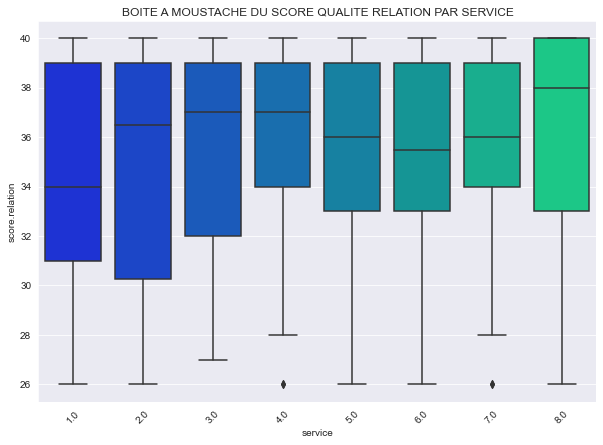

In [115]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 7))
sns.boxplot(data=df_propre, x='service', y='score.relation', palette='winter')
plt.title("BOITE A MOUSTACHE DU SCORE QUALITE RELATION PAR SERVICE")
plt.xticks(rotation=45) # Ajustez la rotation des étiquettes á 45°
plt.show()

#### Etape 2: Statistiques de base des sous populations

In [116]:
StatSer = df_propre.groupby('service')['score.relation'].describe()
StatSer

,count,mean,std,min,25%,50%,75%,max
service,,,,,,,,
1.0,62.0,34.354839,4.838699,26.0,31.00,34.0,39.0,40.0
2.0,54.0,34.407407,5.045149,26.0,30.25,36.5,39.0,40.0
3.0,65.0,35.769231,4.006905,27.0,32.00,37.0,39.0,40.0
4.0,62.0,36.129032,3.721818,26.0,34.00,37.0,39.0,40.0
5.0,61.0,35.229508,4.124696,26.0,33.00,36.0,39.0,40.0
6.0,60.0,35.016667,4.184279,26.0,33.00,35.5,39.0,40.0
7.0,61.0,35.868852,3.442264,26.0,34.00,36.0,39.0,40.0
8.0,67.0,36.134328,4.096915,26.0,33.00,38.0,40.0,40.0


#### Etape 3: Test de Normalite dans les sous-populations

In [117]:
# Effectif 
grpEffSer = df_propre.groupby('service')['score.relation'].value_counts()
grpEffSer

service  score.relation
1.0      40                14
         26                 7
         34                 7
         33                 6
         38                 6
                           ..
8.0      37                 3
         28                 2
         29                 2
         30                 1
         34                 1
Name: score.relation, Length: 105, dtype: int64

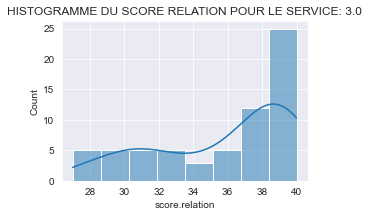

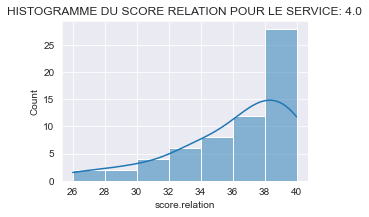

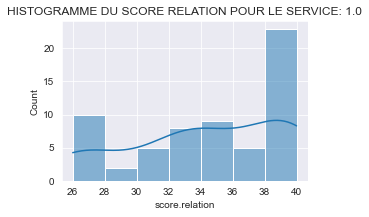

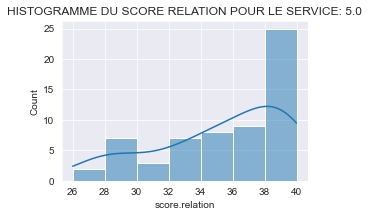

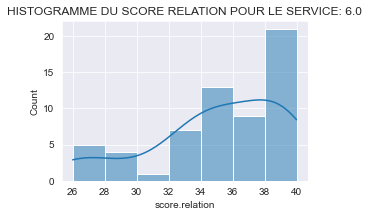

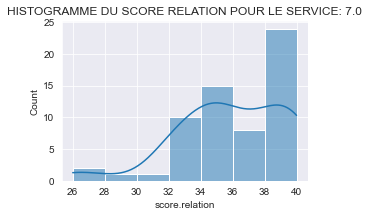

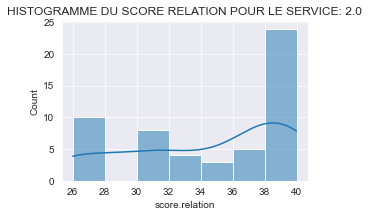

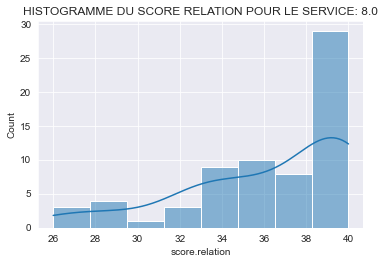

In [153]:
services = df_propre['service'].unique()

# Supprimer les anciens graphiques
plt.close('all')

# Boucle pour créer les sous-graphiques
for i, service in enumerate(services):
    # Filtrer les données pour le service actuel
    data_service = df_propre[df_propre['service'] == service]
    
    # Vérifier si le filtre retourne des résultats
    if not data_service.empty:
        plt.figure(figsize=(15, 10))
        plt.subplot(3, 3, i+1)
        sns.histplot(data=data_service, x='score.relation', kde=True)
        plt.title(f'HISTOGRAMME DU SCORE RELATION POUR LE SERVICE: {service}')

# Ajustement du format de disposition
plt.tight_layout()
plt.show()


In [130]:
# Test de Shapiro 
for service in df_propre['service'].unique():
    data_service = df_propre['score.relation'][df_propre['service'] == service]
    
    # Vérifiez si vous avez au moins trois observations
    if len(data_service) >= 3:
        stat, p = shapiro(data_service)
        print(f"Shapiro test pour la modalité -{service}-: Statistic={stat:.5f}, P-value={p:.5f}")
        
        # Interprétation 
        alpha = 0.05 
        if p > alpha: 
            print("L'échantillon semble suivre une distribution normale (on ne rejette pas H0), alors on continue avec le test parametrique de Barlett\n") 
        else: 
            print("L'échantillon ne semble pas suivre une distribution normale (on rejette H0), alors on continue avec le test non-parametrique de kruskal.test\n") 
    
    else:
        print(f"Le groupe {service} a moins de 3 observations, le test de Shapiro ne peut pas être effectué.")

Shapiro test pour la modalité -3.0-: Statistic=0.85657, P-value=0.00000
L'échantillon ne semble pas suivre une distribution normale (on rejette H0), alors on continue avec le test non-parametrique de kruskal.test

Shapiro test pour la modalité -4.0-: Statistic=0.87742, P-value=0.00002
L'échantillon ne semble pas suivre une distribution normale (on rejette H0), alors on continue avec le test non-parametrique de kruskal.test

Shapiro test pour la modalité -1.0-: Statistic=0.89332, P-value=0.00006
L'échantillon ne semble pas suivre une distribution normale (on rejette H0), alors on continue avec le test non-parametrique de kruskal.test

Shapiro test pour la modalité -5.0-: Statistic=0.89909, P-value=0.00011
L'échantillon ne semble pas suivre une distribution normale (on rejette H0), alors on continue avec le test non-parametrique de kruskal.test

Shapiro test pour la modalité -6.0-: Statistic=0.89903, P-value=0.00012
L'échantillon ne semble pas suivre une distribution normale (on rejette 

#### Etape 4: Test d'égalite des proportions: test de Kruskal Wallis

In [132]:
# Test de Kruskal-Wallis
result_kruskal = kruskal(*[df_propre['score.relation'][df_propre['service'] == prof] for prof in df_propre['service'].unique()])

# Interprétation
alpha = 0.05
if result_kruskal.pvalue < alpha:
    print(f"la P-value est : {round(result_kruskal.pvalue, 2)}, alors on rejette H0, il y a une différence significative entre au moins deux groupes.")
else:
    print(f"la P-value est : {round(result_kruskal.pvalue, 2)}, alors on ne rejette pas H0, il n'y a pas de différence significative entre les groupes.")


la P-value est : 0.23, alors on ne rejette pas H0, il n'y a pas de différence significative entre les groupes.
